<a href="https://colab.research.google.com/github/Devavrata-Tripathy/Sarcasm-Detector-using-NLP/blob/main/Sarcasm_detector.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Getting the dataset (the data is in JSON format)
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sarcasm.json \
    -O /tmp/sarcasm.json


--2020-12-03 08:12:02--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sarcasm.json
Resolving storage.googleapis.com (storage.googleapis.com)... 64.233.189.128, 108.177.97.128, 74.125.203.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|64.233.189.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5643545 (5.4M) [application/json]
Saving to: ‘/tmp/sarcasm.json’

/tmp/sarcasm.json   100%[===================>]   5.38M  --.-KB/s    in 0.05s   

2020-12-03 08:12:03 (98.4 MB/s) - ‘/tmp/sarcasm.json’ saved [5643545/5643545]



In [ ]:
#importing the necessary libraries
#We need the json library to convert the dataset which is in JSON format
import json
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
#The dataset consists of URL(article link), headlines and the label(whether it is sarcastic or not) in JSON format
#so we are going to load them and get the headlines and labels and add them into the lists   
with open("/tmp/sarcasm.json", 'r') as f:
    datastore = json.load(f)

sentences = []
labels = []

for itm in datastore:
  sentences.append(itm['headline'])
  labels.append(itm['is_sarcastic'])
print(sentences)
print(labels)

["former versace store clerk sues over secret 'black code' for minority shoppers", "the 'roseanne' revival catches up to our thorny political mood, for better and worse", "mom starting to fear son's web series closest thing she will have to grandchild", 'boehner just wants wife to listen, not come up with alternative debt-reduction ideas', 'j.k. rowling wishes snape happy birthday in the most magical way', "advancing the world's women", 'the fascinating case for eating lab-grown meat', 'this ceo will send your kids to school, if you work for his company', 'top snake handler leaves sinking huckabee campaign', "friday's morning email: inside trump's presser for the ages", 'airline passengers tackle man who rushes cockpit in bomb threat', 'facebook reportedly working on healthcare features and apps', "north korea praises trump and urges us voters to reject 'dull hillary'", "actually, cnn's jeffrey lord has been 'indefensible' for a while", 'barcelona holds huge protest in support of refug

In [ ]:
#Now lets divide the data into training data and validation data
train_sentences = sentences[:20000]
test_sentences = sentences[20000:]
train_labels = labels[:20000]
test_labels = labels[20000:]

In [ ]:
#Preparing(tokenizing, converting into sequence, padding) the training data 
tokenizer = Tokenizer(num_words=10000, oov_token='<OOV>')
tokenizer.fit_on_texts(train_sentences)
word_index = tokenizer.word_index
print(word_index)

{'<OOV>': 1, 'to': 2, 'of': 3, 'the': 4, 'in': 5, 'for': 6, 'a': 7, 'on': 8, 'and': 9, 'with': 10, 'is': 11, 'new': 12, 'trump': 13, 'man': 14, 'from': 15, 'at': 16, 'about': 17, 'you': 18, 'by': 19, 'this': 20, 'after': 21, 'be': 22, 'up': 23, 'out': 24, 'that': 25, 'how': 26, 'as': 27, 'it': 28, 'not': 29, 'are': 30, 'your': 31, 'what': 32, 'his': 33, 'all': 34, 'he': 35, 'will': 36, 'who': 37, 'just': 38, 'has': 39, 'more': 40, 'one': 41, 'year': 42, 'into': 43, 'report': 44, 'have': 45, 'why': 46, 'over': 47, 'area': 48, 'u': 49, 'donald': 50, 'says': 51, 'day': 52, 'can': 53, 's': 54, 'first': 55, 'woman': 56, 'time': 57, 'like': 58, 'get': 59, 'old': 60, 'no': 61, 'her': 62, "trump's": 63, 'off': 64, 'now': 65, 'an': 66, 'obama': 67, 'life': 68, 'people': 69, 'women': 70, 'house': 71, "'": 72, 'was': 73, 'still': 74, 'white': 75, 'back': 76, 'make': 77, 'than': 78, 'clinton': 79, 'down': 80, 'when': 81, 'my': 82, '5': 83, 'could': 84, 'world': 85, 'americans': 86, 'if': 87, 'i': 

In [ ]:
train_seq = tokenizer.texts_to_sequences(train_sentences)
train_padded_seq = pad_sequences(sequences=train_seq, maxlen = 100, padding='post', truncating='post')
print(train_padded_seq)

[[ 328    1  799 ...    0    0    0]
 [   4 6840 3096 ...    0    0    0]
 [ 153  890    2 ...    0    0    0]
 ...
 [  79 1729    1 ...    0    0    0]
 [  53 5108 4735 ...    0    0    0]
 [ 312  705    1 ...    0    0    0]]


In [ ]:
#Preparing the test data
test_seq = tokenizer.texts_to_sequences(test_sentences)
test_padded_seq = pad_sequences(sequences=test_seq, maxlen = 100, padding='post', truncating='post')
print(test_padded_seq.shape)

(6709, 100)


In [ ]:
import numpy as np
#Converting the data into numpy arrays
train_padded_seq = np.array(train_padded_seq)
train_labels = np.array(train_labels)
test_padded_seq = np.array(test_padded_seq)
test_labels = np.array(test_labels)

In [15]:
#Defining the model
#Embedding layer converts the 2D tensor into 3D temsor for feeding into the dense layer.
#It has 3 imp parameters: 1. input_dim (the size of the vocabulary) 2. output_dim (the no of neurons in the dense layer or in the output) 3. input_length (length of the sequence)

model = tf.keras.Sequential([
                             tf.keras.layers.Embedding(10000, 16, input_length =100 ),
                             tf.keras.layers.GlobalAveragePooling1D(),
                             tf.keras.layers.Dense(24,activation='relu'),
                             tf.keras.layers.Dense(1,activation='sigmoid')
])

In [17]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics = ['accuracy'])
history = model.fit(train_padded_seq, train_labels, epochs = 30, validation_data=(test_padded_seq, test_labels), verbose = 2)

Epoch 1/30
625/625 - 2s - loss: 0.0285 - accuracy: 0.9912 - val_loss: 1.0428 - val_accuracy: 0.8143
Epoch 2/30
625/625 - 2s - loss: 0.0277 - accuracy: 0.9916 - val_loss: 1.0486 - val_accuracy: 0.8131
Epoch 3/30
625/625 - 2s - loss: 0.0228 - accuracy: 0.9942 - val_loss: 1.0806 - val_accuracy: 0.8122
Epoch 4/30
625/625 - 2s - loss: 0.0230 - accuracy: 0.9940 - val_loss: 1.1174 - val_accuracy: 0.8128
Epoch 5/30
625/625 - 2s - loss: 0.0213 - accuracy: 0.9940 - val_loss: 1.1472 - val_accuracy: 0.8123
Epoch 6/30
625/625 - 2s - loss: 0.0191 - accuracy: 0.9950 - val_loss: 1.2020 - val_accuracy: 0.8125
Epoch 7/30
625/625 - 2s - loss: 0.0194 - accuracy: 0.9944 - val_loss: 1.2426 - val_accuracy: 0.8104
Epoch 8/30
625/625 - 2s - loss: 0.0173 - accuracy: 0.9959 - val_loss: 1.2739 - val_accuracy: 0.8098
Epoch 9/30
625/625 - 2s - loss: 0.0157 - accuracy: 0.9962 - val_loss: 1.2673 - val_accuracy: 0.8047
Epoch 10/30
625/625 - 2s - loss: 0.0150 - accuracy: 0.9960 - val_loss: 1.3129 - val_accuracy: 0.8086

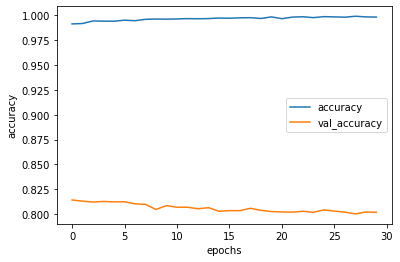

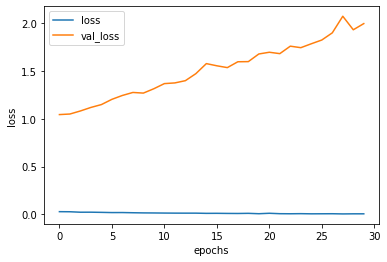

In [20]:
import matplotlib.pyplot as plt

def plot(history, metric):
  plt.plot(history.history[metric])
  plt.plot(history.history['val_'+metric])
  plt.xlabel('epochs')
  plt.ylabel(metric)
  plt.legend([metric, 'val_'+metric])
  plt.show()

plot(history, 'accuracy')
plot(history, 'loss')

In [24]:
#Testing the model using some sample data...
sentence = ['Scientists to kill ducks to see why they are dying', 'Safety meeting ends in accident', 'Farms protest continues over low MSP']
sequence = tokenizer.texts_to_sequences(sentence)
padded_sequence = pad_sequences(sequences=sequence, maxlen = 100, padding='post', truncating='post')
result = model.predict(padded_sequence)
print(result)

[[9.9998999e-01]
 [7.9101324e-04]
 [8.6558198e-11]]
